In [1]:
from src.analytics.preprocess import TextNormalizer
import pandas as pd
import numpy as np

dataframe = pd.read_csv('data/train_data.csv').drop(columns=['timestamp'])
normalizer = TextNormalizer('data/stopwords.txt')
normalizer.fit()

TextNormalizer(stopwords_filename='data/stopwords.txt')

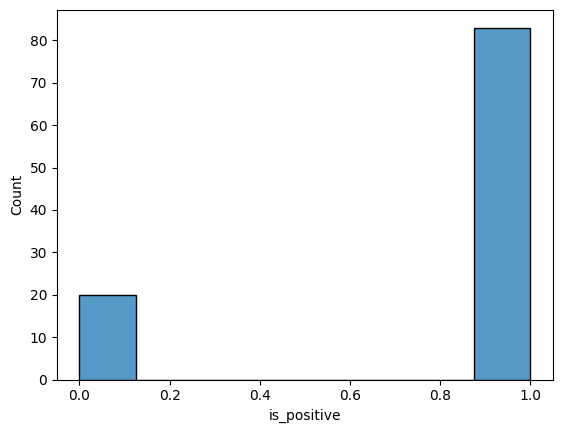

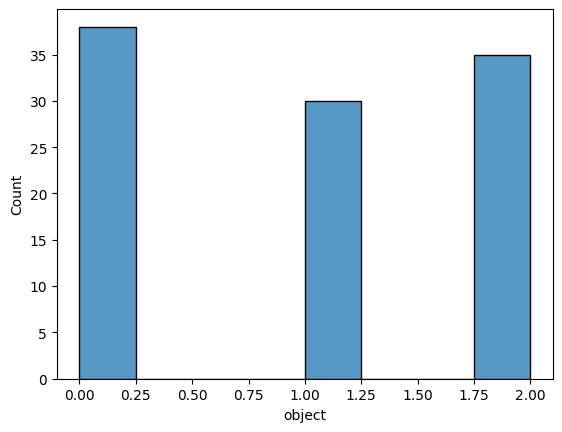

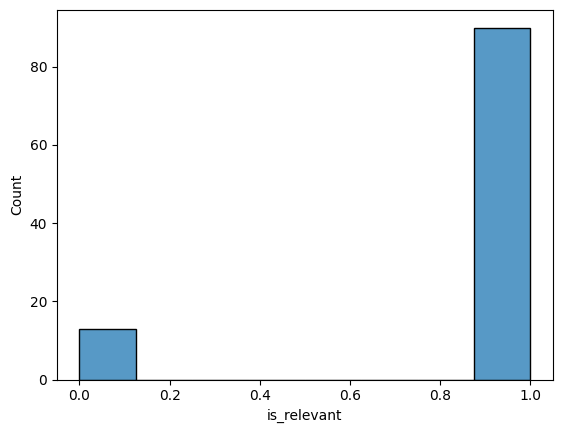

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataframe['is_positive'])
plt.show()
sns.histplot(dataframe['object'])
plt.show()
sns.histplot(dataframe['is_relevant'])
plt.show()

In [3]:
def concat_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe['text'] = (dataframe['question_1'] + ' '
                         + dataframe['question_2'] + ' '
                         + dataframe['question_3'] + ' '
                         + dataframe['question_4'] + ' '
                         + dataframe['question_5'])
    return dataframe.drop(columns=['question_1',
                                   'question_2',
                                   'question_3',
                                   'question_4',
                                   'question_5'])


dataframe = concat_columns(dataframe)
dataframe

,is_relevant,object,is_positive,text
0,1,0,1,Основы программирования Интерактивный подход к...
1,1,0,1,Основы программирования Подробное объяснение л...
2,1,0,1,Основы программирования Введение в программиро...
3,1,0,1,Основы программирования Понятное изложение осн...
4,1,0,1,Основы программирования Кларность и структура ...
...,...,...,...,...
98,1,2,1,Основы программирования Преподователь раз тако...
99,1,2,1,Новейшие тенденции в IT Очень понравилось изуч...
100,1,2,0,Новейшие тенденции в IT Очень подробный разбор...
101,1,2,0,"Java api браузеров Понравилась тема Да, препод..."


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

transformer = Pipeline(steps=[
    ('normalize', TextNormalizer('data/stopwords.txt')),
    ('vectorizer', CountVectorizer(
        ngram_range=(1, 3)
    ))
])
transformer.fit(dataframe['text'].to_list())

Pipeline(steps=[('normalize',
                 TextNormalizer(stopwords_filename='data/stopwords.txt')),
                ('vectorizer', CountVectorizer(ngram_range=(1, 3)))])

In [5]:
X = transformer.transform(dataframe['text'].to_list())
y_relevant = dataframe['is_relevant'].to_numpy()
y_object = dataframe['object'].to_numpy()
y_positive = dataframe['is_positive'].to_numpy()

In [6]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


def format_report(relevant_model,
                  object_model,
                  positive_model) -> None:
    print('relevant classification\n' +
          f'{classification_report(y_relevant, relevant_model.predict(X.astype(np.float32)))}')
    ConfusionMatrixDisplay.from_predictions(y_relevant, relevant_model.predict(X.astype(np.float32)))
    plt.show()
    print('object classification\n' +
          f'{classification_report(y_object, object_model.predict(X.astype(np.float32)))}')
    ConfusionMatrixDisplay.from_predictions(y_object, object_model.predict(X.astype(np.float32)))
    plt.show()
    print('positive classification\n' +
          f'{classification_report(y_positive, positive_model.predict(X.astype(np.float32)))}')
    ConfusionMatrixDisplay.from_predictions(y_positive, positive_model.predict(X.astype(np.float32)))
    plt.show()

* relevant - RandomForestClassifier
* object - RandomForestClassifier
* positive - RandomForestClassifier

MultiLabelsClassifier(object_model=RandomForestClassifier(),
                      positive_model=RandomForestClassifier(),
                      relevant_model=RandomForestClassifier())

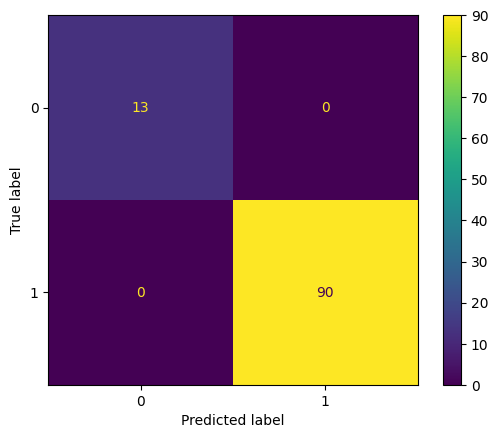

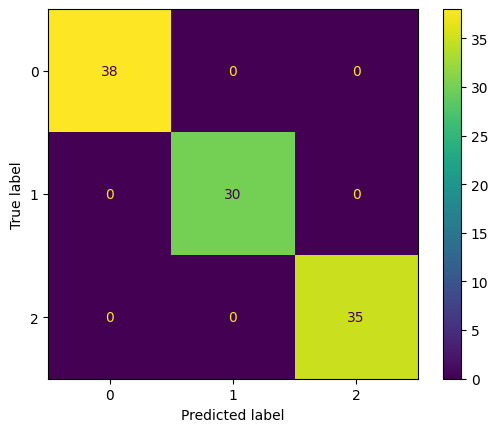

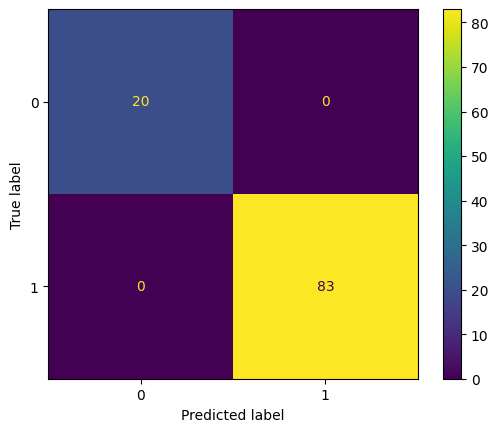

In [7]:
from src.analytics.model import MultiLabelsClassifier
from sklearn.ensemble import RandomForestClassifier

clf = MultiLabelsClassifier(RandomForestClassifier(),
                            RandomForestClassifier(),
                            RandomForestClassifier())
clf.fit(X, y_relevant, y_object, y_positive)

In [ ]:
clf.predict(X)